<a href="https://colab.research.google.com/github/LoveIsDestiny/Deep_Learning/blob/main/DL_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Simple Linear Regression

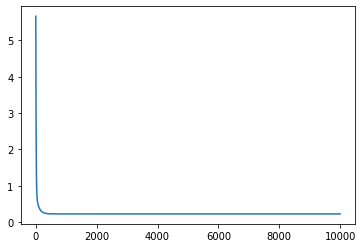

학습 후 가중치 : tensor(2.0000, grad_fn=<SqueezeBackward0>)


In [77]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

x_train = torch.FloatTensor([[0], [1], [2]])
y_train = torch.FloatTensor([[0], [1], [4]])

# weight initializing 
w = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

optimizer = optim.SGD([w, b], lr = 0.01)

nb_epochs = 10000

Error_list = []

for epoch in range(nb_epochs + 1):
  hypothesis = x_train * w + b

  Error = torch.mean( (hypothesis - y_train)** 2) # 모델 출력값 - 실제 값
  Error_list.append(Error.item())


  optimizer.zero_grad()
  Error.backward()
  optimizer.step()

plt.plot(Error_list)
plt.show()

print("학습 후 가중치 :", w.squeeze())

2. Multiple Linear Regression

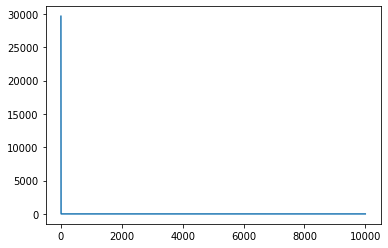

학습 후 가중치 :  tensor([[0.8881],
        [0.4642],
        [0.6582]], requires_grad=True)


In [78]:
x_train = torch.FloatTensor([[73,80,75], 
                             [93,88,93], 
                             [89, 91, 90],
                             [96,98,100],
                             [73,66,70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

''' 데이터 전처리
mu = x_train.mean(dim=0)
sigma = x_train.std(dim=0)
norm_x_train = (x_train - mu) / sigma
print(norm_x_train)
'''

w = torch.zeros((3, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

optimizer = optim.SGD([w, b] , lr = 1e-5)

nb_epochs = 10000
Error_list = []

for epoch in range(nb_epochs + 1):
  #matmul 함수를 사용하여 행렬 곱셈
  hypothesis = x_train.matmul(w) + b

  Error = F.mse_loss(hypothesis, y_train)
  Error_list.append(Error.item())

  optimizer.zero_grad()
  Error.backward()
  optimizer.step()

plt.plot(Error_list)
plt.show()
print("학습 후 가중치 : ", w)

3. Linear Modeling

In [80]:
class MultiLR(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3, 1)

  def forward(self, x):
    return self.linear(x)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 5001/10000 Cost: 0.600894
Epoch 5002/10000 Cost: 0.600831
Epoch 5003/10000 Cost: 0.600782
Epoch 5004/10000 Cost: 0.600733
Epoch 5005/10000 Cost: 0.600682
Epoch 5006/10000 Cost: 0.600627
Epoch 5007/10000 Cost: 0.600576
Epoch 5008/10000 Cost: 0.600526
Epoch 5009/10000 Cost: 0.600463
Epoch 5010/10000 Cost: 0.600410
Epoch 5011/10000 Cost: 0.600370
Epoch 5012/10000 Cost: 0.600303
Epoch 5013/10000 Cost: 0.600259
Epoch 5014/10000 Cost: 0.600199
Epoch 5015/10000 Cost: 0.600149
Epoch 5016/10000 Cost: 0.600101
Epoch 5017/10000 Cost: 0.600043
Epoch 5018/10000 Cost: 0.599984
Epoch 5019/10000 Cost: 0.599935
Epoch 5020/10000 Cost: 0.599887
Epoch 5021/10000 Cost: 0.599826
Epoch 5022/10000 Cost: 0.599774
Epoch 5023/10000 Cost: 0.599723
Epoch 5024/10000 Cost: 0.599681
Epoch 5025/10000 Cost: 0.599615
Epoch 5026/10000 Cost: 0.599559
Epoch 5027/10000 Cost: 0.599519
Epoch 5028/10000 Cost: 0.599462
Epoch 5029/10000 Cost: 0.599411
Epoch 5030/10000 Cost: 0.599362
Epoc

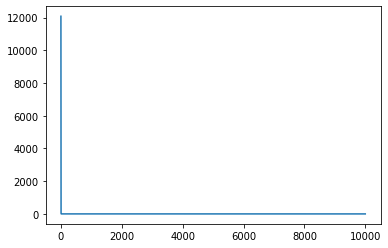

학습 후 가중치 : [('linear.weight', Parameter containing:
tensor([[0.8226, 0.3890, 0.8007]], requires_grad=True)), ('linear.bias', Parameter containing:
tensor([-0.2703], requires_grad=True))]


In [89]:
model = MultiLR()

optimizer = optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 10000
cost_list = []

for epoch in range(nb_epochs + 1):
    # H(x) 계산
    prediction = model(x_train)
    # cost 계산
    
    cost = F.mse_loss(prediction, y_train)
    cost_list.append(cost.item())
    # cost로 H(x) 개선
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력    
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

plt.plot(cost_list)
plt.show()
print("학습 후 가중치 :", list(model.named_parameters())

4. XOR Operation

In [95]:
class MRModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2, 32, bias = True)
    self.linear2 = nn.Linear(32, 64)
    self.linear3 = nn.Linear(64, 128)
    self.linear4 = nn.Linear(128, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.sigmoid(self.linear(x))
    x = self.sigmoid(self.linear2(x))
    x = self.sigmoid(self.linear3(x))
    x = self.sigmoid(self.linear4(x))
    return x


Epoch    0/50000 Cost: 0.696380
Epoch 1000/50000 Cost: 0.693136
Epoch 2000/50000 Cost: 0.693130
Epoch 3000/50000 Cost: 0.693123
Epoch 4000/50000 Cost: 0.693116
Epoch 5000/50000 Cost: 0.693109
Epoch 6000/50000 Cost: 0.693101
Epoch 7000/50000 Cost: 0.693093
Epoch 8000/50000 Cost: 0.693084
Epoch 9000/50000 Cost: 0.693073
Epoch 10000/50000 Cost: 0.693062
Epoch 11000/50000 Cost: 0.693049
Epoch 12000/50000 Cost: 0.693034
Epoch 13000/50000 Cost: 0.693016
Epoch 14000/50000 Cost: 0.692995
Epoch 15000/50000 Cost: 0.692971
Epoch 16000/50000 Cost: 0.692941
Epoch 17000/50000 Cost: 0.692904
Epoch 18000/50000 Cost: 0.692858
Epoch 19000/50000 Cost: 0.692798
Epoch 20000/50000 Cost: 0.692719
Epoch 21000/50000 Cost: 0.692609
Epoch 22000/50000 Cost: 0.692451
Epoch 23000/50000 Cost: 0.692210
Epoch 24000/50000 Cost: 0.691807
Epoch 25000/50000 Cost: 0.691052
Epoch 26000/50000 Cost: 0.689322
Epoch 27000/50000 Cost: 0.683568
Epoch 28000/50000 Cost: 0.632344
Epoch 29000/50000 Cost: 0.030466
Epoch 30000/50000 Co

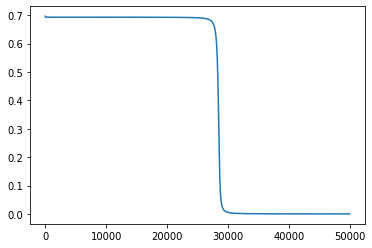

In [96]:
x_train = torch.FloatTensor([[0, 0],
                             [0, 1],
                             [1, 0],
                             [1, 1]])
y_train = torch.FloatTensor([[0], [1], [1], [0]])

model = MRModel()

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

nb_epochs = 50000
cost_list = []

for epoch in range(nb_epochs + 1):
  prediction = model(x_train)

  cost = criterion(prediction, y_train)
  cost_list.append(cost.item())

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
    
  if epoch % 1000 == 0 :  
      print('Epoch {:4d}/{} Cost: {:.6f}'.format( epoch, nb_epochs, cost.item() ))
      #print(model.state_dict() )
plt.plot(cost_list)
plt.show()

In [97]:
with torch.no_grad():
    hypothesis = model(x_train)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == y_train).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', y_train)
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.4522612e-04]
 [9.9983859e-01]
 [9.9983704e-01]
 [1.7501980e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  tensor([[0.],
        [1.],
        [1.],
        [0.]])
정확도(Accuracy):  1.0
